In [1]:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr,fisher_exact
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist
from GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from SampleLists.SampleFileFunctions import *

import os
from Utils import cacheOnDisk
from queue.qp import qp,fakeqp
from addloglevels import sethandlers

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

done1
stop
stop
done1
stop
done
done


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate


'09052018'

In [26]:
level='g'
dataFolder='AllSeqProjects'

MPAlevel, MPAlevelBinary=gen_mb_df(level, dataFolder)

loading MPASpid file from DFOut folder in AllSeqProjects
MPASpid table length is 2155
MPA data table length for level g is 276
RA table shape is 5519_276
binary table shape is 5519_276
should be identical


In [27]:
MPAlevel.head()

Tax,Abiotrophia,Acidaminococcaceae_unclassified,Acidaminococcus,Acidobacteriaceae_unclassified,Acinetobacter,Actinobacillus,Actinobaculum,Actinomyces,Adlercreutzia,Aerococcus,...,Turicibacter,Ureaplasma,Vagococcus,Varibaculum,Veillonella,Vibrio,Viruses_noname,Weissella,Wohlfahrtiimonas,Yersinia
FD,,,,,,,,,,,,,,,,,,,,,
FD959,0.0,0.0,0.001230,0.0,0.0,0.0,0.0,0.000000,0.000237,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FD2303,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.067472,0.000000,0.0,...,0.0,0.0,0.0,0.001276,0.000000,0.0,0.0,0.0,0.0,0.0
DT1606560252,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000066,0.0,0.0,0.0,0.0,0.0
FD1205,0.0,0.0,0.001852,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
DT1705560986,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [28]:
MbDF_RA=MPAlevel
distMetricRA='braycurtis'

In [29]:
print 'generating condensed distance matrix for RA data - %s' %distMetricRA
MbDF_RA_distMat_condensed=pd.Series(pdist(MbDF_RA.fillna(0), distMetricRA))

# add sample names:
sample1List=[]
sample2List=[]

count=0
for i in range(len(MbDF_RA.index)):
    for j in range(i+1,len(MbDF_RA.index)):
        sample1=MbDF_RA.index[i]
        sample2=MbDF_RA.index[j]
        sample1List.append(sample1)
        sample2List.append(sample2)
        count=count+1
#     print count
MbDF_RA_distMat_condensed_org=pd.DataFrame({'sample1':sample1List,'sample2':sample2List,'dist':MbDF_RA_distMat_condensed})


generating condensed distance matrix for RA data - braycurtis


In [30]:
print 'top similar pairs for MbDF_RA:' 
print MbDF_RA_distMat_condensed_org.sort_values(by='dist')

top similar pairs for MbDF_RA:
              dist       sample1       sample2
14500321  0.000000        FD2620        FD2636
9433270   0.002708  DT1609530197  DT1606560529
2364303   0.008227  DT1611600457  DT1611600669
14070971  0.009090  DT1705560514  DT1705560005
3541481   0.010139  DT1705560989  DT1705560557
13118784  0.010991  DT1705560386  DT1705560997
8210763   0.013277  DT1705550860  DT1611600990
1917788   0.016709  DT1611600820  DT1611600110
9565034   0.017015  DT1705560604  DT1705561013
4325628   0.018488  DT1705560195  DT1705560764
9500276   0.022571  DT1705560390  DT1705560715
3873958   0.023660  DT1611600238  DT1611600609
3643234   0.025545  DT1606560314  DT1705552067
3216940   0.027195  DT1610590467  DT1610590414
11820798  0.027298  DT1705560722  DT1705560749
11820694  0.028613  DT1705560722        FD2669
14129603  0.031278        FD2669  DT1705560749
3528321   0.031391        FD1953        FD1442
2167978   0.032110        FD1301  DT1705552263
8306419   0.032978        FD1

In [31]:
FDsamples = read_sql('select  DnaID,UserID from Lab.dna', getengine())

In [32]:
FDsamples.head()

,DnaID,UserID
0,FD70,924
1,FD64,1429
2,FD65,440
3,FD51,460
4,FD50,677


In [33]:
MbDF_RA_distMat_condensed_org_withUserID=pd.merge(MbDF_RA_distMat_condensed_org,FDsamples,how='left',
                                                 left_on='sample1',right_on='DnaID')
MbDF_RA_distMat_condensed_org_withUserID=MbDF_RA_distMat_condensed_org_withUserID.rename(columns={'UserID':'sample1UserID'})
MbDF_RA_distMat_condensed_org_withUserID=pd.merge(MbDF_RA_distMat_condensed_org_withUserID,FDsamples,how='left',
                                                 left_on='sample2',right_on='DnaID')
MbDF_RA_distMat_condensed_org_withUserID=MbDF_RA_distMat_condensed_org_withUserID.rename(columns={'UserID':'sample2UserID'})
MbDF_RA_distMat_condensed_org_withUserID=MbDF_RA_distMat_condensed_org_withUserID.drop(['DnaID_x','DnaID_y'],axis=1)



In [34]:

MbDF_RA_distMat_condensed_org_withUserID=MbDF_RA_distMat_condensed_org_withUserID.sort_values(by='dist').dropna()

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/wisdom/python/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/wisdom/python/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/sbenari/workspace/PNP/tunneltoamazondb.py", line 33, in _start_tunnel
    ssh_tunnel.expect(pexpect.EOF)
  File "/usr/wisdom/python/lib/python2.7/site-packages/pexpect/spawnbase.py", line 321, in expect
    timeout, searchwindowsize, async)
  File "/usr/wisdom/python/lib/python2.7/site-packages/pexpect/spawnbase.py", line 345, in expect_list
    return exp.expect_loop(timeout)
  File "/usr/wisdom/python/lib/python2.7/site-packages/pexpect/expect.py", line 107, in expect_loop
    return self.timeout(e)
  File "/usr/wisdom/python/lib/python2.7/site-packages/pexpect/expect.py", line 70, in timeout
    raise TIMEOUT(msg)
TIMEOUT: Timeout exceeded.
command: /usr/bin/ssh
args: ['/usr/bin/ssh', 

In [35]:
MbDF_RA_distMat_condensed_org_withUserID

,dist,sample1,sample2,sample1UserID,sample2UserID
14500321,0.000000,FD2620,FD2636,8718.0,8022.0
3528321,0.031391,FD1953,FD1442,5902.0,5902.0
6505800,0.033476,FD1962,FD1451,4334.0,4334.0
8424781,0.041554,FD591,FD1308,2453.0,3765.0
7717180,0.042937,FD2530,FD871,9809.0,2174.0
8053481,0.044283,FD1463,FD2180,5178.0,5178.0
7756020,0.047716,FD871,FD1451,2174.0,4334.0
2164139,0.049598,FD1301,FD1962,4703.0,4334.0
7717325,0.049953,FD2530,FD1451,9809.0,4334.0
2163890,0.050249,FD1301,FD1615,4703.0,1644.0


In [36]:
MbDF_RA_distMat_condensed_org_withUserID[(MbDF_RA_distMat_condensed_org_withUserID['sample1UserID']==5902)&\
(MbDF_RA_distMat_condensed_org_withUserID['sample2UserID']==5902)]

,dist,sample1,sample2,sample1UserID,sample2UserID
3528321,0.031391,FD1953,FD1442,5902.0,5902.0
3530362,0.664552,FD1953,FD2204,5902.0,5902.0
11492950,0.676840,FD1442,FD2204,5902.0,5902.0


In [37]:
print 'loading BD_FD table'
f1 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/updatedBDandFDlists/BDfile_30042018.xlsx'
BD_FD = pd.read_excel(f1)
BD_FD = BD_FD.rename(columns={'DnaID':'BD'})
BD_FD_toUse = BD_FD[['BD', 'UserID']]
BD_FD_toUse = BD_FD_toUse.drop_duplicates()
print 'number of BD-UserID pairs is %s' % len(BD_FD_toUse)
BD_FD_toUse.head()

loading BD_FD table
number of BD-UserID pairs is 1100


,BD,UserID
0,BD1,2252
1,BD2,1879
2,BD3,2314
3,BD4,2238
4,BD5,2465


In [39]:
MbDF_RA_distMat_condensed_org_withUserID_withBD=pd.merge(MbDF_RA_distMat_condensed_org_withUserID,BD_FD_toUse,how='left',
                                                        left_on='sample1UserID',right_on='UserID')
MbDF_RA_distMat_condensed_org_withUserID_withBD=MbDF_RA_distMat_condensed_org_withUserID_withBD.drop('UserID',axis=1).rename(\
columns={'BD':'sample1BD'})
MbDF_RA_distMat_condensed_org_withUserID_withBD=pd.merge(MbDF_RA_distMat_condensed_org_withUserID_withBD,BD_FD_toUse,how='left',
                                                        left_on='sample2UserID',right_on='UserID')
MbDF_RA_distMat_condensed_org_withUserID_withBD=MbDF_RA_distMat_condensed_org_withUserID_withBD.drop('UserID',axis=1).rename(\
columns={'BD':'sample2BD'})
MbDF_RA_distMat_condensed_org_withUserID_withBD


,dist,sample1,sample2,sample1UserID,sample2UserID,sample1BD,sample2BD
0,0.000000,FD2620,FD2636,8718,8022,NaN,NaN
1,0.031391,FD1953,FD1442,5902,5902,BD900,BD900
2,0.033476,FD1962,FD1451,4334,4334,BD908,BD908
3,0.041554,FD591,FD1308,2453,3765,BD694,BD511
4,0.042937,FD2530,FD871,9809,2174,NaN,BD24
5,0.044283,FD1463,FD2180,5178,5178,BD899,BD899
6,0.047716,FD871,FD1451,2174,4334,BD24,BD908
7,0.049598,FD1301,FD1962,4703,4334,BD419,BD908
8,0.049953,FD2530,FD1451,9809,4334,NaN,BD908
9,0.050249,FD1301,FD1615,4703,1644,BD419,BD615


In [40]:
file1='%s/Sample files/PNP515-relationships.xlsx' %MyPath
PNP515rel=pd.read_excel(file1)
PNP515rel.head()

,BD,Relations,Relative,is relative in PNP515?,comments,RelGroup,SameGroup,BloodGroup
0,BD12,husband of BD121(568087),BD121,1,NaN,2,1,1
1,BD121,wife of BD12(388380),BD12,1,NaN,2,1,1
2,BD124,husband of BD127(225255),BD127,1,NaN,3,1,1
3,BD127,wife of BD124(345928),BD124,1,NaN,3,1,1
4,BD146,wife of BD881(595162),BD881,1,NaN,4,1,1


In [41]:
df=MbDF_RA_distMat_condensed_org_withUserID_withBD

merged=pd.merge(df,PNP515rel[['BD','Relations']],how='left',left_on='sample1BD',right_on='BD')
merged=merged.rename(columns={'Relations':'sample1 relations'})
merged=pd.merge(merged,PNP515rel[['BD','Relations']],how='left',left_on='sample2BD',right_on='BD' )
merged=merged.rename(columns={'Relations':'sample2 relations'})
merged=merged.drop(['BD_x','BD_y'],axis=1)
merged.sort_values(by='dist')

,dist,sample1,sample2,sample1UserID,sample2UserID,sample1BD,sample2BD,sample1 relations,sample2 relations
0,0.000000,FD2620,FD2636,8718,8022,NaN,NaN,NaN,NaN
1,0.031391,FD1953,FD1442,5902,5902,BD900,BD900,NaN,NaN
2,0.033476,FD1962,FD1451,4334,4334,BD908,BD908,husband of BD503(366052),husband of BD503(366052)
3,0.041554,FD591,FD1308,2453,3765,BD694,BD511,NaN,NaN
4,0.042937,FD2530,FD871,9809,2174,NaN,BD24,NaN,NaN
5,0.044283,FD1463,FD2180,5178,5178,BD899,BD899,NaN,NaN
6,0.047716,FD871,FD1451,2174,4334,BD24,BD908,NaN,husband of BD503(366052)
7,0.049598,FD1301,FD1962,4703,4334,BD419,BD908,NaN,husband of BD503(366052)
8,0.049953,FD2530,FD1451,9809,4334,NaN,BD908,NaN,husband of BD503(366052)
10,0.050249,FD1301,FD1615,4703,1644,BD419,BD839,NaN,The same person as BD615. husband of BD617/BD8...


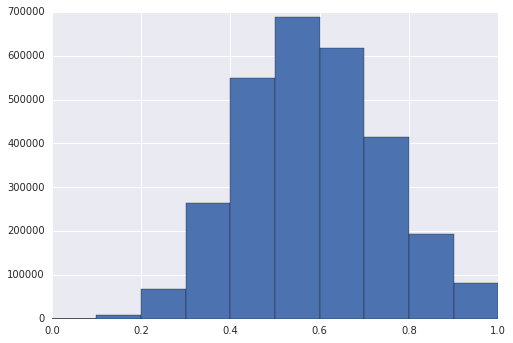

In [42]:
merged['dist'].hist()
plt.show()

In [54]:
merged[(merged['sample1BD']=='BD714')&(merged['sample2BD']=='BD705')]

,dist,sample1,sample2,sample1UserID,sample2UserID,sample1BD,sample2BD,sample1 relations,sample2 relations
800,0.116056,FD610,FD2096,3290,3290,BD714,BD705,same person as BD705,same person as BD714
924,0.119839,FD683,FD682,3290,3290,BD714,BD705,same person as BD705,same person as BD714
3524,0.162234,FD684,FD681,3290,3290,BD714,BD705,same person as BD705,same person as BD714
3669,0.163583,FD694,FD681,3290,3290,BD714,BD705,same person as BD705,same person as BD714
4796,0.173651,FD694,FD688,3290,3290,BD714,BD705,same person as BD705,same person as BD714
6567,0.185378,FD684,FD686,3290,3290,BD714,BD705,same person as BD705,same person as BD714
8125,0.193917,FD694,FD684,3290,3290,BD714,BD705,same person as BD705,same person as BD714
9796,0.201426,FD684,FD688,3290,3290,BD714,BD705,same person as BD705,same person as BD714
10543,0.204393,FD682,FD681,3290,3290,BD714,BD705,same person as BD705,same person as BD714
15994,0.222712,FD681,FD688,3290,3290,BD714,BD705,same person as BD705,same person as BD714
